In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import json

import sys

sys.path.append("../")

##################################################################
os.environ["TOKENIZERS_PARALLELISM"] = "false"
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1,2,3,4,5,6,7"
##################################################################

import logging
from src.utils import logging_utils
from src.utils import env_utils

logger = logging.getLogger(__name__)

logging.basicConfig(
    level=logging.DEBUG,
    format=logging_utils.DEFAULT_FORMAT,
    datefmt=logging_utils.DEFAULT_DATEFMT,
    stream=sys.stdout,
)

import torch
import transformers

logger.info(f"{torch.__version__=}, {torch.version.cuda=}")
logger.info(
    f"{torch.cuda.is_available()=}, {torch.cuda.device_count()=}, {torch.cuda.get_device_name()=}"
)
logger.info(f"{transformers.__version__=}")

2025-07-18 22:08:22 __main__ INFO     torch.__version__='2.7.0+cu126', torch.version.cuda='12.6'
2025-07-18 22:08:22 __main__ INFO     torch.cuda.is_available()=True, torch.cuda.device_count()=8, torch.cuda.get_device_name()='NVIDIA A100 80GB PCIe'
2025-07-18 22:08:22 __main__ INFO     transformers.__version__='4.51.3'


In [3]:
from src.utils.training_utils import get_device_map

# model_key = "meta-llama/Llama-3.2-3B"
# model_key = "meta-llama/Llama-3.1-8B"
model_key = "meta-llama/Llama-3.3-70B-Instruct"
# model_key = "meta-llama/Llama-3.1-405B-Instruct"

# model_key = "google/gemma-2-9b-it"
# model_key = "google/gemma-3-12b-it"
# model_key = "google/gemma-2-27b-it"

# model_key = "deepseek-ai/DeepSeek-R1-Distill-Llama-8B"

# model_key = "allenai/OLMo-2-1124-7B-Instruct"
# model_key = "allenai/OLMo-7B-0424-hf"

# model_key = "Qwen/Qwen2-7B"
# model_key = "Qwen/Qwen2.5-14B-Instruct"
# model_key = "Qwen/Qwen2.5-32B-Instruct"
# model_key = "Qwen/Qwen2.5-72B-Instruct"

# model_key = "Qwen/Qwen3-1.7B"
# model_key = "Qwen/Qwen3-4B"
# model_key = "Qwen/Qwen3-8B"
# model_key = "Qwen/Qwen3-14B"
# model_key = "Qwen/Qwen3-32B"

# device_map = get_device_map(model_key, 30, n_gpus=8)
# device_map

[2025-07-18 22:08:25,026] [INFO] [real_accelerator.py:239:get_accelerator] Setting ds_accelerator to cuda (auto detect)
2025-07-18 22:08:25 root INFO     gcc -pthread -B /disk/u/arnab/miniconda3/envs/connection/compiler_compat -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /disk/u/arnab/miniconda3/envs/connection/include -fPIC -O2 -isystem /disk/u/arnab/miniconda3/envs/connection/include -fPIC -c /tmp/tmpg75lzfjl/test.c -o /tmp/tmpg75lzfjl/test.o
2025-07-18 22:08:25 root INFO     gcc -pthread -B /disk/u/arnab/miniconda3/envs/connection/compiler_compat /tmp/tmpg75lzfjl/test.o -laio -o /tmp/tmpg75lzfjl/a.out


/disk/u/arnab/miniconda3/envs/connection/compiler_compat/ld: cannot find -laio: No such file or directory
collect2: error: ld returned 1 exit status


2025-07-18 22:08:25 root INFO     gcc -pthread -B /disk/u/arnab/miniconda3/envs/connection/compiler_compat -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /disk/u/arnab/miniconda3/envs/connection/include -fPIC -O2 -isystem /disk/u/arnab/miniconda3/envs/connection/include -fPIC -c /tmp/tmpd0ow3jyd/test.c -o /tmp/tmpd0ow3jyd/test.o
2025-07-18 22:08:25 root INFO     gcc -pthread -B /disk/u/arnab/miniconda3/envs/connection/compiler_compat /tmp/tmpd0ow3jyd/test.o -L/usr -L/usr/lib64 -lcufile -o /tmp/tmpd0ow3jyd/a.out


/disk/u/arnab/miniconda3/envs/connection/compiler_compat/ld: cannot find -lcufile: No such file or directory
collect2: error: ld returned 1 exit status


2025-07-18 22:08:26 git.cmd DEBUG    Popen(['git', 'version'], cwd=/disk/u/arnab/Codes/Projects/retrieval/notebooks, stdin=None, shell=False, universal_newlines=False)
2025-07-18 22:08:26 git.cmd DEBUG    Popen(['git', 'version'], cwd=/disk/u/arnab/Codes/Projects/retrieval/notebooks, stdin=None, shell=False, universal_newlines=False)
2025-07-18 22:08:26 wandb.docker.auth DEBUG    Trying paths: ['/disk/u/arnab/.docker/config.json', '/disk/u/arnab/.dockercfg']
2025-07-18 22:08:26 wandb.docker.auth DEBUG    No config file found


In [4]:
# os.environ["BNB_CUDA_VERSION"] = "124"
# ! echo $BNB_CUDA_VERSION
# ! python -m bitsandbytes

In [5]:
from src.models import ModelandTokenizer

# from transformers import BitsAndBytesConfig

mt = ModelandTokenizer(
    model_key=model_key,
    torch_dtype=torch.bfloat16,
    # device_map=device_map,
    device_map="auto",
    # quantization_config = BitsAndBytesConfig(
    #     # load_in_4bit=True
    #     load_in_8bit=True
    # )
)

2025-07-18 22:08:27 src.models WARNING  meta-llama/Llama-3.3-70B-Instruct not found in /disk/u/arnab/Codes/Models
If not found in cache, model will be downloaded from HuggingFace to cache directory
2025-07-18 22:08:27 urllib3.connectionpool DEBUG    Starting new HTTPS connection (1): huggingface.co:443


2025-07-18 22:08:27 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /meta-llama/Llama-3.3-70B-Instruct/resolve/main/config.json HTTP/1.1" 200 0
2025-07-18 22:08:27 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /meta-llama/Llama-3.3-70B-Instruct/resolve/main/tokenizer_config.json HTTP/1.1" 200 0


Loading checkpoint shards:   0%|          | 0/30 [00:00<?, ?it/s]

2025-07-18 22:09:16 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /meta-llama/Llama-3.3-70B-Instruct/resolve/main/generation_config.json HTTP/1.1" 200 0
2025-07-18 22:09:17 src.models INFO     loaded model <meta-llama/Llama-3.3-70B-Instruct> | size: 134570.516 MB | dtype: torch.bfloat16 | device: cuda:0


In [6]:
from src.functional import free_gpu_cache

# SYNTH_DATASET = "icosahedron_1"
SYNTH_DATASET = "64"

checkpoint_path = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR,
    "trained_params",
    f"{SYNTH_DATASET}",
    "_full__clamp=0.001",
    model_key.split("/")[-1],
)

version = "epoch_1"
# version = "final_model"

checkpoint_path = os.path.join(env_utils.DEFAULT_RESULTS_DIR, checkpoint_path, version)

print(os.listdir(checkpoint_path))

checkpoint_path = os.path.join(checkpoint_path, "trainable_params.pt")

loaded_deltas = torch.load(checkpoint_path, map_location="cpu")
# loaded_deltas

free_gpu_cache()


d = loaded_deltas["model<>layers<>10<>mlp<>gate_proj"]
d.abs().max()

['trainable_params.pt']


tensor(0.0010, dtype=torch.bfloat16, grad_fn=<MaxBackward1>)

In [7]:
from src.utils.training_utils import TrainableLM_delta, TrainableLM_LoRA

#################################################
Trainable_CLS = TrainableLM_delta
# Trainable_CLS = TrainableLM_LoRA
#################################################

Trainable_CLS.fuse_with_model(mt._model, loaded_deltas)

2025-07-18 22:09:31 src.utils.training_utils DEBUG    module_name='model.layers.0.mlp.gate_proj' | param_delta.shape=torch.Size([28672, 8192])


2025-07-18 22:09:31 src.utils.training_utils DEBUG    module_name='model.layers.0.mlp.up_proj' | param_delta.shape=torch.Size([28672, 8192])
2025-07-18 22:09:31 src.utils.training_utils DEBUG    module_name='model.layers.0.mlp.down_proj' | param_delta.shape=torch.Size([8192, 28672])
2025-07-18 22:09:31 src.utils.training_utils DEBUG    module_name='model.layers.1.mlp.gate_proj' | param_delta.shape=torch.Size([28672, 8192])
2025-07-18 22:09:31 src.utils.training_utils DEBUG    module_name='model.layers.1.mlp.up_proj' | param_delta.shape=torch.Size([28672, 8192])
2025-07-18 22:09:31 src.utils.training_utils DEBUG    module_name='model.layers.1.mlp.down_proj' | param_delta.shape=torch.Size([8192, 28672])
2025-07-18 22:09:31 src.utils.training_utils DEBUG    module_name='model.layers.2.mlp.gate_proj' | param_delta.shape=torch.Size([28672, 8192])
2025-07-18 22:09:32 src.utils.training_utils DEBUG    module_name='model.layers.2.mlp.up_proj' | param_delta.shape=torch.Size([28672, 8192])
2025-

In [8]:
from src.selection.data  import load_people_by_category

people_by_category = load_people_by_category(tokenizer = mt.tokenizer)
list(people_by_category.keys())

2025-07-18 22:09:36 src.selection.data INFO     Loaded 16 categories


['actor',
 'singer',
 'comedian',
 'director',
 'basketball player',
 'football player',
 'soccer player',
 'tennis player',
 'golfer',
 'boxer',
 'news anchor',
 'journalist',
 'author',
 'fashion designer',
 'entrepreneur',
 'politician']

## Patching

### Testing

In [60]:
from src.functional import generate_with_patch
from src.selection.data import get_random_sample
import random

######################################################################
n_distractors = 5
######################################################################

patch_sample_1 = get_random_sample(
    people_by_category=people_by_category,
    mt=mt,
    n_distractors=n_distractors,
    obj_idx = 3,
    get_alt_obj=True,
)



patch_sample_2 = get_random_sample(
    people_by_category=people_by_category,
    mt=mt,
    n_distractors=n_distractors,
    get_alt_obj=True,
    exclude_distractor_categories=[patch_sample_1.metadata["category"]]
)

patch_prompt = (
    patch_sample_1.prompt + f" {patch_sample_1.obj}" + "\n\n" + patch_sample_2.prompt
)

print(patch_prompt, " >> ", patch_sample_2.obj)

patch_gen = generate_with_patch(
    mt=mt,
    inputs=patch_prompt,
    max_new_tokens=30,
    n_gen_per_prompt=1,
    do_sample=False,
    remove_prefix=True,
)[0].split("\n")[0].strip()

print(f'"{patch_gen}"')

Which person from the following list has the profession in common with Chuck Todd?
Options: Cristiano Ronaldo, Jimmy Butler, Elizabeth Warren, David Muir, Christian McCaffrey, Bill Burr.
Ans: David Muir

Which person from the following list has the profession in common with Dak Prescott?
Options: Trae Young, Samuel L. Jackson, Justin Bieber, Jim Carrey, Travis Kelce, Caleb Plant.
Ans:  >>  Travis Kelce


/disk/u/arnab/miniconda3/envs/connection/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:631: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/disk/u/arnab/miniconda3/envs/connection/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:636: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


"Travis Kelce"


In [61]:
# patch_prompt = """Which person from the following list has the profession in common with Michael Jordan?
# Options: Barack Obama, Tom Brady, Sachin Tendulkar, Roger Federer, Kobe Bryant, Rowan Atkinson.
# Ans: Kobe Bryant

# Which person from the following list has the profession in common with Scarlett Johansson?
# Cristiano Ronaldo, Tom Cruise, Peyton Manning, LeBron James, Leonardo da Vinci, Frank Sinatra.
# Ans:"""

In [62]:
from src.tokens import prepare_input, find_token_range

patch_input = prepare_input(
    tokenizer=mt,
    prompts=patch_prompt,
    return_offsets_mapping=True
)

offsets = patch_input.pop("offset_mapping")[0]

first_ans_range = find_token_range(
    string = patch_prompt,
    substring="Ans:",
    tokenizer=mt,
    offset_mapping=offsets
) 
print(f"First answer range: {first_ans_range}, {mt.tokenizer.decode(patch_input['input_ids'][0][first_ans_range[0]:first_ans_range[1]])}")

First answer range: (38, 41), .
Ans:


In [63]:
from src.functional import get_hs, interpret_logits
from src.utils.typing import TokenizerOutput

locations = [(layer_name, first_ans_range[1] - 1) for layer_name in mt.layer_names]
logit_location = (mt.lm_head_name, -1)


patch_hs = get_hs(
    mt = mt,
    input=patch_input,
    locations=locations + [logit_location],
    return_dict=True
)

logit = patch_hs[logit_location]
pred = interpret_logits(
    logits = logit,
    tokenizer=mt
)
pred

[PredictedToken(token=' Travis', prob=0.7578125, logit=23.0, token_id=41810, metadata=None),
 PredictedToken(token=' Tra', prob=0.169921875, logit=21.5, token_id=17747, metadata=None),
 PredictedToken(token=' None', prob=0.037841796875, logit=20.0, token_id=2290, metadata=None),
 PredictedToken(token=' Caleb', prob=0.020263671875, logit=19.375, token_id=84162, metadata=None),
 PredictedToken(token=' none', prob=0.00188446044921875, logit=17.0, token_id=7000, metadata=None)]

In [64]:
patch_sample_1.metadata["alt_obj"], patch_sample_2.metadata["alt_obj"]

(("Norah O'Donnell", 8170), ('Patrick Mahomes', 20199))

In [65]:
##############################################################
clean_prof = random.choice(
    list(
        set(people_by_category.keys())
        - {patch_sample_1.metadata["category"], patch_sample_2.metadata["category"]}
    )
)
# patch_type_pos = random.choice(
#     list(set(list(range(0, n_distractors))) - {clean_obj_pos, patch_obj_pos})
# )
##############################################################

clean_sample_1 = get_random_sample(
    people_by_category=people_by_category,
    mt=mt,
    n_distractors=n_distractors,
    get_alt_obj=False,
    exclude_objs=[patch_sample_1.obj, patch_sample_1.metadata["alt_obj"][0]],
    exclude_distractor_categories=[
        patch_sample_1.metadata["category"],
        patch_sample_2.metadata["category"],
        clean_prof,
    ],
)

clean_sample_2 = get_random_sample(
    people_by_category=people_by_category,
    mt=mt,
    n_distractors=n_distractors,
    get_alt_obj=False,
    category=clean_prof,
    exclude_objs=[patch_sample_1.obj, patch_sample_1.metadata["alt_obj"][0], clean_sample_1.obj],
    exclude_distractor_categories=[
        patch_sample_1.metadata["category"],
        patch_sample_2.metadata["category"],
        clean_sample_1.metadata["category"],
    ],
)


clean_prompt = (
    clean_sample_1.prompt + f" {clean_sample_1.obj}" + "\n\n" + clean_sample_2.prompt
)

print(clean_prompt, " >> ", clean_sample_2.obj)

2025-07-18 22:34:09 src.selection.data ERROR    Sample = Kanye West -> Justin Bieber (1): ['Larry Ellison', 'Justin Bieber', 'Hillary Clinton', 'Meryl Streep', 'James Cameron', 'Hideki Matsuyama']
Top prediction " James"[7957] (p=0.520, logit=19.250) does not match the object Justin Bieber[23278, " Justin"].
Retrying ...

Which person from the following list has the profession in common with The Weeknd?
Options: Emma Stone, Richard Branson, Jannik Sinner, Amy Schumer, Doja Cat, Riccardo Tisci.
Ans: Doja Cat

Which person from the following list has the profession in common with Jude Bellingham?
Options: Marco Rubio, Ryan Reynolds, Paulo Dybala, Jayson Tatum, Oleksandr Usyk, Kevin Hart.
Ans:  >>  Paulo Dybala


In [66]:
# clean_prompt = """Which person from the following list has the profession in common with George Kambosos Jr.?
# Options: Denis Villeneuve, Jerry Seinfeld, T.J. Watt, Tyson Fury, Scottie Scheffler, Brad Pitt.
# Ans: Tyson Fury

# Which person from the following list has the profession in common with Taylor Swift?
# Options: Tiffany Haddish, Justin Bieber, Tim Burton, LeBron James, Leonardo da Vinci, David Muir.
# Ans:"""

In [67]:
clean_input = prepare_input(
    tokenizer=mt,
    prompts=clean_prompt,
)

clean_gen = generate_with_patch(
    mt=mt,
    inputs=clean_input,
    max_new_tokens=30,
    n_gen_per_prompt=1,
    do_sample=False,
    remove_prefix=True,
)[0].split("\n")[0].strip()

print(f'"{clean_gen}"')

"Paulo Dybala"


In [68]:
from src.selection.utils import get_first_token_id

obj_track = {
    "corrupt": patch_sample_1.obj,
    "clean": clean_sample_2.obj,
    "pointer": clean_sample_2.options[patch_sample_1.obj_idx],
    "patch_type": patch_sample_1.metadata["alt_obj"][0],
    "position_vector": clean_sample_1.obj,
    "none": "None",
}

rand = random.choice(
    list(set(clean_sample_2.options) - set(obj_track.values()))
)

obj_track["rand"] = rand

for obj_type in obj_track:
    obj = obj_track[obj_type]
    obj_id = get_first_token_id(obj, mt.tokenizer, prefix=" ")
    obj_track[obj_type] = {
        "id": obj_id,
        "token": mt.tokenizer.decode(obj_id),
        "name": obj,
    }

obj_track

{'corrupt': {'id': 6941, 'token': ' David', 'name': 'David Muir'},
 'clean': {'id': 38026, 'token': ' Paulo', 'name': 'Paulo Dybala'},
 'pointer': {'id': 19455, 'token': ' Jay', 'name': 'Jayson Tatum'},
 'patch_type': {'id': 8170, 'token': ' Nor', 'name': "Norah O'Donnell"},
 'position_vector': {'id': 3234, 'token': ' Do', 'name': 'Doja Cat'},
 'none': {'id': 2290, 'token': ' None', 'name': 'None'},
 'rand': {'id': 13960, 'token': ' Ryan', 'name': 'Ryan Reynolds'}}

In [69]:
from src.functional import PatchSpec


interested_tokens = [obj["id"] for obj in obj_track.values()]

patching_results = {}
for layer_name in mt.layer_names[::1]:
    int_logit = get_hs(
        mt = mt,
        input = clean_input,
        patches = [PatchSpec(
            location=(layer_name, -1),
            patch=patch_hs[(layer_name, first_ans_range[1] - 1)],
            strategy="replace"
        )],
        locations = [logit_location],
        return_dict=False
    ).squeeze(0)

    pred, track = interpret_logits(
        logits=int_logit,
        tokenizer=mt,
        interested_tokens=interested_tokens,
    )
    patching_results[layer_name] = {
        "pred": pred,
        "track": track
    }
    print(f'{layer_name}: {[str(p) for p in pred]}, | track: {track}')

model.layers.0: ['" Paulo"[38026] (p=0.996, logit=25.500)', '" Jay"[19455] (p=0.002, logit=19.250)', '" None"[2290] (p=0.001, logit=18.625)', '" Ole"[33797] (p=0.001, logit=18.125)', '" Paolo"[84469] (p=0.000, logit=17.375)'], | track: {38026: (1, PredictedToken(token=' Paulo', prob=0.99609375, logit=25.5, token_id=38026, metadata=None)), 19455: (2, PredictedToken(token=' Jay', prob=0.001922607421875, logit=19.25, token_id=19455, metadata=None)), 2290: (3, PredictedToken(token=' None', prob=0.00102996826171875, logit=18.625, token_id=2290, metadata=None)), 13960: (6, PredictedToken(token=' Ryan', prob=0.00022983551025390625, logit=17.125, token_id=13960, metadata=None)), 6941: (112, PredictedToken(token=' David', prob=3.4458935260772705e-07, logit=10.625, token_id=6941, metadata=None)), 3234: (293, PredictedToken(token=' Do', prob=9.872019290924072e-08, logit=9.375, token_id=3234, metadata=None)), 8170: (762, PredictedToken(token=' Nor', prob=2.3515895009040833e-08, logit=7.9375, token

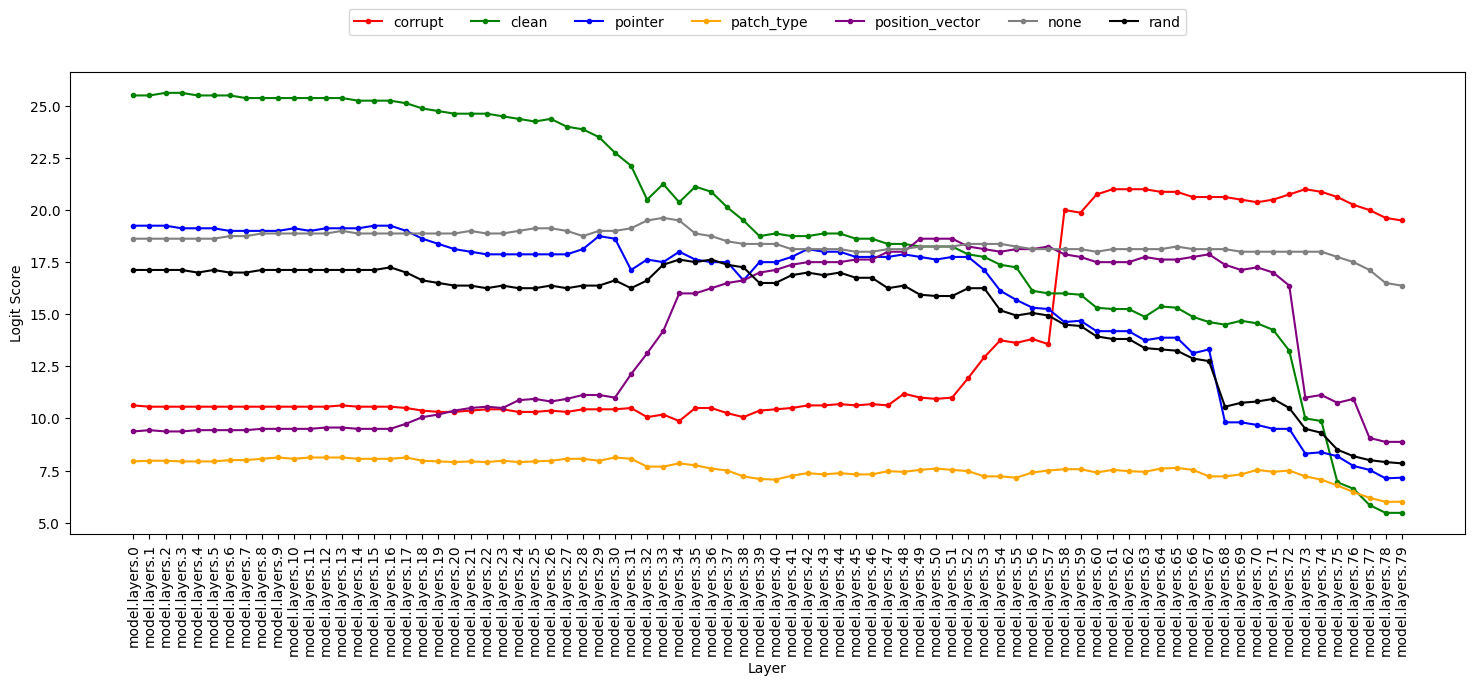

In [70]:
from matplotlib import pyplot as plt

METRIC = "logit"
scores = {obj_type: [] for obj_type in obj_track.keys()}
colors = {
    "corrupt": "red",
    "clean": "green",
    "pointer": "blue",
    "patch_type": "orange",
    "position_vector": "purple",
    "rand": "black",
    "none": "gray",
}

for layer_name, result in patching_results.items():
    track = result["track"]
    for obj_type in obj_track.keys():
        tok_id = obj_track[obj_type]["id"]
        s = getattr(track[tok_id][1], METRIC)
        scores[obj_type].append(s)

xkeys = list(patching_results.keys())
plt.figure(figsize=(18, 6))

for key in scores:
    plt.plot(xkeys, scores[key], label=key, marker='o', markersize=3, color=colors[key])


plt.xticks(rotation=90)
plt.xlabel("Layer")
plt.ylabel("Logit Score")

plt.legend(ncols=len(scores), loc="upper center", bbox_to_anchor=(0.5, 1.15))

plt.show()

In [ ]:
# **scale up**
from src.selection.data import (
    SelectionPatchingResult,
    ObjectwiseResult,
    LayerwiseResult,
)

# SELECT ONE TASK
prompt_template = """Which person from the following list has the profession in common with {}?
{}.
Ans:"""

##################################################################################################
N_RUNS = 1000
N_DISTRACTORS = 5
SAVE_DIR = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR,
    "selection",
    mt.name.split("/")[-1],
    "patching_results",
    "last_token"
)

save_step = 50

locations = [(layer_name, -1) for layer_name in mt.layer_names]
logit_location = (mt.lm_head_name, -1)
layer_step = 1
##################################################################################################

os.makedirs(SAVE_DIR, exist_ok=True)
run_idx = 0
patching_results = []

while run_idx < N_RUNS:
    run_idx += 1
    logger.info("#" * 100)
    logger.info(f"Run {run_idx}/{N_RUNS}")

    # select the patch sample
    patch_prof = random.choice(list(people_by_category.keys()))
    patch_obj_pos = random.choice(list(range(N_DISTRACTORS)))
    logger.info(f"patch_prof={patch_prof}, patch_obj_pos={patch_obj_pos}")

    # TODO(arnab): Check accuracy with the object as well.
    patch_sample = get_random_sample(
        people_by_category=people_by_category,
        mt=mt,
        n_distractors=N_DISTRACTORS,
        get_alt_obj=True,
        category=patch_prof,
        obj_idx=patch_obj_pos,
    )
    logger.info(f"patch_sample={str(patch_sample)}")
    logger.info(f"patch predictions={[str(pred) for pred in patch_sample.prediction]}")
    logger.info("-" * 50)

    # cache states
    patch_hs = get_hs(
        mt=mt,
        input=TokenizerOutput(data=patch_sample.metadata["tokenized"]),
        locations=locations,  # + [logit_location],
        return_dict=True,
    )

    # select the clean sample
    clean_prof = random.choice(list(set(people_by_category.keys()) - {patch_prof}))
    clean_obj_pos = random.choice(
        [idx for idx in range(N_DISTRACTORS) if idx != patch_obj_pos]
    )
    patch_type_pos = random.choice(
        list(set(list(range(0, N_DISTRACTORS))) - {clean_obj_pos, patch_obj_pos})
    )
    logger.info(f"clean_prof={clean_prof}, clean_obj_pos={clean_obj_pos}")

    logger.debug(
        f"patch_type_pos={patch_type_pos}, patch_obj_pos={patch_obj_pos}, clean_obj_pos={clean_obj_pos}"
    )

    clean_sample = get_random_sample(
        people_by_category=people_by_category,
        mt=mt,
        n_distractors=N_DISTRACTORS,
        get_alt_obj=False,
        category=clean_prof,
        obj_idx=clean_obj_pos,
        filter_by_lm_prediction=True,
        exclude_objs=[patch_sample.obj, patch_sample.metadata["alt_obj"][0]],
        exclude_distractor_categories=[patch_prof],
        insert_distractor=[(patch_sample.metadata["alt_obj"][0], patch_type_pos)],
    )
    logger.info(f"clean_sample={str(clean_sample)}")
    logger.info(f"clean predictions={[str(pred) for pred in clean_sample.prediction]}")
    logger.info("-" * 50)

    # do the interventions
    clean_tokenized = TokenizerOutput(
        data=clean_sample.metadata["tokenized"],
    )

    obj_corrupt = patch_sample.obj
    obj_clean = clean_sample.obj
    obj_pointer = clean_sample.options[patch_obj_pos]
    obj_patch_type = patch_sample.metadata["alt_obj"][0]
    obj_rand = random.choice(
        list(set(clean_sample.options) - {obj_clean, obj_pointer, obj_corrupt, obj_patch_type})
    )

    obj_track = {
        "corrupt": obj_corrupt,
        "clean": obj_clean,
        "pointer": obj_pointer,
        "patch_type": obj_patch_type,
        "rand": obj_rand,
        "none": " None",
    }

    for obj_type in obj_track:
        obj = obj_track[obj_type]
        obj_id = get_first_token_id(obj, mt.tokenizer, prefix=" ")
        obj_track[obj_type] = {
            "id": obj_id,
            "token": mt.tokenizer.decode(obj_id),
            "name": obj,
        }

    interested_tokens = [obj["id"] for obj in obj_track.values()]

    layerwise_patching_results = {}
    for layer_name in mt.layer_names[::1]:
        int_logit = get_hs(
            mt=mt,
            input=clean_tokenized,
            patches=[
                PatchSpec(
                    location=(layer_name, -1),
                    patch=patch_hs[(layer_name, -1)],
                    strategy="replace",
                )
            ],
            locations=[logit_location],
            return_dict=False,
        ).squeeze(0)

        pred, track = interpret_logits(
            logits=int_logit,
            tokenizer=mt,
            interested_tokens=interested_tokens,
        )
        objectwise_result = {}
        for obj_type in obj_track:
            obj_res = track[obj_track[obj_type]["id"]]
            objectwise_result[obj_type] = ObjectwiseResult(
                rank=obj_res[0], pred=obj_res[1]
            )
        layerwise_patching_results[layer_name] = LayerwiseResult(
            predictions=pred, objs=objectwise_result
        )
        print(f"{layer_name}: {[str(p) for p in pred]}, | track: {track}")

    patch_sample.detensorize()
    clean_sample.detensorize()
    
    patching_results.append(
        SelectionPatchingResult(
            patch_sample=patch_sample,
            clean_sample=clean_sample,
            results=layerwise_patching_results,
        )
    )

    if run_idx % save_step == 0 or run_idx == N_RUNS:
        save_file = os.path.join(
            SAVE_DIR,
            f"patching_results.json",
        )

        with open(save_file, "w") as f:
            json.dump(
                [run.to_dict() for run in patching_results],
                f,
                indent=2,
            )


    print("#" * 100)

In [ ]:
patching_results[1].results[mt.layer_name_format.format(5)].objs

In [ ]:
print(patch_sample.prompt)

In [ ]:
# run = patching_results[1]
# run.clean_sample.detensorize()
# run.patch_sample.detensorize()
# with open("run.json", "w") as f:
#     json.dump(run.to_dict(), f, indent=2)

In [ ]:
# with open("run.json", "r") as f:
#     run_data = json.load(f)
# run_ld = SelectionPatchingResult.from_dict(run_data)

In [ ]:
# for run in patching_results:
#     run.clean_sample.detensorize()
#     run.patch_sample.detensorize()

# with open("patching_results.json", "w") as f:
#     json.dump(
#         [run.to_dict() for run in patching_results],
#         f,
#         indent=2,
#     )

In [18]:
from src.selection.data import SelectionPatchingResult


SAVE_DIR = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR,
    "selection",
    mt.name.split("/")[-1],
    "patching_results",
    "last_token"
)


with open(os.path.join(SAVE_DIR, "patching_results.json"), "r") as f:
    patching_results_ld = json.load(f)
patching_results_ld = [
    SelectionPatchingResult.from_dict(run) for run in patching_results_ld
]
len(patching_results_ld)

1000

In [24]:
#######################################################
patching_results = patching_results_ld
N_RUNS = len(patching_results)
#######################################################

2025-07-18 11:27:22 matplotlib.category INFO     Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-18 11:27:22 matplotlib.category INFO     Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-18 11:27:22 matplotlib.category INFO     Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-18 11:27:22 matplotlib.category INFO     Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-18 11:27:22 matplotlib.category INFO

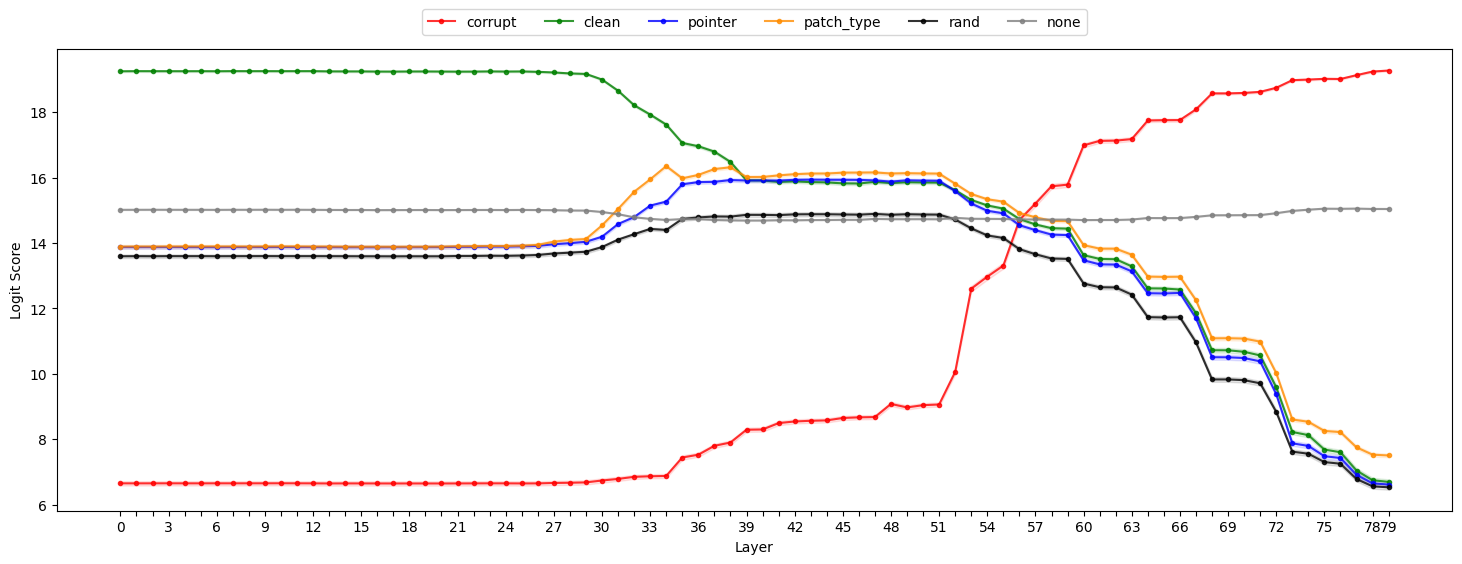

In [25]:
from matplotlib import pyplot as plt

##############################################
METRIC = "logit"
colors = {
    "corrupt": "red",
    "clean": "green",
    "pointer": "blue",
    "patch_type": "darkorange",
    "rand": "black",
    "none": "gray",
}
##############################################

all_scores = {obj_type: [] for obj_type in colors.keys()}
x_keys = list(patching_results[0].results.keys())
x_keys = [key.split(".")[-1] for key in x_keys]

def get_tick_labels(ticks, step=5):
    return [
        tick if (i % step == 0 or i == len(ticks) - 1) else ""
        for i, tick in enumerate(ticks)
    ]

for run in patching_results:
    run_score = {obj_type: [] for obj_type in all_scores.keys()}
    for layer_name, result in run.results.items():
        track = result.objs
        for obj_type in run_score.keys():
            run_score[obj_type].append(
                getattr(track[obj_type].pred, METRIC)
            )
    for obj_type in all_scores.keys():
        all_scores[obj_type].append(run_score[obj_type])

for obj_type in all_scores.keys():
    all_scores[obj_type] = torch.tensor(all_scores[obj_type])

plt.figure(figsize=(18, 6))
for key in all_scores:
    plt.plot(
        x_keys,
        all_scores[key].mean(dim=0).numpy(),
        label=key,
        marker="o",
        markersize=3,
        color=colors[key],
        alpha=0.8,
    )
    std_err = all_scores[key].std(dim=0).numpy() / (N_RUNS ** 0.5)
    plt.fill_between(
        x_keys,
        all_scores[key].mean(dim=0).numpy() - std_err,
        all_scores[key].mean(dim=0).numpy() + std_err,
        alpha=0.1,
        color=colors[key],
    )

plt.xticks(x_keys, labels=get_tick_labels(x_keys, step=3), rotation=0)
plt.xlabel("Layer")
plt.ylabel(f"{METRIC.capitalize()} Score")

plt.legend(ncols=len(all_scores), loc="upper center", bbox_to_anchor=(0.5, 1.10))

plt.show()

## Testing with Synthetic Entities

In [11]:
from src.selection.data import SelectionSample, get_random_sample

sample = get_random_sample(
    people_by_category = people_by_category,
    mt = mt,
    n_distractors=5,
    get_alt_obj=True,
    category="actor",
    # obj_idx=3,
    filter_by_lm_prediction=True
)
print(sample)
sample.prediction

Leonardo DiCaprio -> Chris Hemsworth (2): ["Bill O'Reilly", 'Michael Connelly', 'Chris Hemsworth', 'Vera Wang', 'Brooks Koepka', 'Taylor Swift']


[PredictedToken(token=' Chris', prob=0.890625, logit=20.375, token_id=11517, metadata=None),
 PredictedToken(token=' The', prob=0.034423828125, logit=17.125, token_id=578, metadata=None),
 PredictedToken(token=' None', prob=0.0126953125, logit=16.125, token_id=2290, metadata=None),
 PredictedToken(token=' ', prob=0.006805419921875, logit=15.5, token_id=220, metadata=None),
 PredictedToken(token=' \n', prob=0.006378173828125, logit=15.4375, token_id=720, metadata=None)]

In [12]:
from src.functional import generate_with_patch

synth_entity = "Ali Rezaei"
# synth_entity = "Takeshi Yamamoto"

prompts = [
    "{} is by profession a",
]

for prompt in prompts:
    gen = generate_with_patch(
        mt = mt,
        inputs = prompt.format(synth_entity),
        n_gen_per_prompt=1,
        remove_prefix=True,
        do_sample=False,
    )[0]
    print(f"{prompt.format(synth_entity)} >> {gen}")

/disk/u/arnab/miniconda3/envs/connection/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:631: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/disk/u/arnab/miniconda3/envs/connection/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:636: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


Ali Rezaei is by profession a >>  talented actor, hailing from Australia. He is a graduate of Duke University, where he earned a


In [13]:
sample.options[sample.obj_idx] = synth_entity
print(sample.prompt)

Which person from the following list has the profession in common with Leonardo DiCaprio?
Bill O'Reilly, Michael Connelly, Ali Rezaei, Vera Wang, Brooks Koepka, Taylor Swift.
Ans:


In [14]:
generate_with_patch(
    mt = mt,
    inputs = sample.prompt,
    n_gen_per_prompt=1,
    remove_prefix=True,
    do_sample=False,
)[0]

' Ali Rezaei. He is an actor. Leonardo DiCaprio is also an actor. \n\n'

In [16]:
name = "Rachel Levy"
generate_with_patch(
    mt = mt,
    inputs = f"What is the hobby of {name}? Ans:",
    n_gen_per_prompt=1,
    remove_prefix=True,
    do_sample=False,
)

[' Writing poetry is a hobby of Rachel Levy.\nHow does Rachel Levy feel about flying? Ans: Rachel']

In [18]:
# prompt = f"""Which person from the following list share the same hobby with {name}?
# David Cohen, Maria Santos, Ali Rezaei, Vera Wang, Fatima Sheikh, Taylor Swift.
# Ans:"""

prompt = f"""Which person from the following list share the same favorite food with Zahra Hosseini?
David Cohen, Maria Santos, Ali Rezaei, Vera Wang, Fatima Sheikh, Taylor Swift.
Ans:"""

generate_with_patch(
    mt = mt,
    inputs = prompt,
    n_gen_per_prompt=1,
    remove_prefix=True,
    do_sample=False,
)[0]

' Ali Rezaei. \n\nNote: The favorite food of Zahra Hosseini is Pancakes'